# Product Recommender for Online Stores

How online stores can help customers to buy the right product from their millions of products,so that online retailers can retain the customer from going elsewhere and see yearly increase in their average order value. Build a recommendation system so that customers can get the right product with personalized info.

Online stores show millions of products to the customer from their catalog. Choosing the correct product for their needs is becoming difficult because of so much information.Since customers are more likely to buy based on personalized recommendations, management has decided to go for a recommendation system so that they can retain the customer and hence increase yearly product sales

## Refernces

The dataset here is taken from the below website.

Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has several datasets. For this case study, I am using the Electronics dataset.

## Data Dictionary

### Sample review dataset:

"reviewerID": "A2SUAM1J3GNN3B",  
"asin": "0000013714",  
"reviewerName": "J. McDonald",  
"helpful": [2, 3],  
"reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",  
"overall": 5.0,  
"summary": "Heavenly Highway Hymns",  
"unixReviewTime": 1252800000,  
"reviewTime": "09 13, 2009"  

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfr = pd.read_csv('../Data/Amzn_Electronics_Reviews.csv',header=0)

In [3]:
dfr.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [4]:
dfr.shape

(1689188, 9)

In [5]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664309 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1688117 non-null  object 
 5   overall         1689188 non-null  float64
 6   summary         1689173 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 116.0+ MB


In [6]:
# change column name 
dfr = dfr.rename(columns={'reviewerID': 'reviewerId'})
dfr = dfr.rename(columns={'asin': 'productId'})
dfr = dfr.rename(columns={'overall': 'ratings'})
dfr = dfr.rename(columns={'unixReviewTime': 'timestamp'})

In [7]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   reviewerId    1689188 non-null  object 
 1   productId     1689188 non-null  object 
 2   reviewerName  1664309 non-null  object 
 3   helpful       1689188 non-null  object 
 4   reviewText    1688117 non-null  object 
 5   ratings       1689188 non-null  float64
 6   summary       1689173 non-null  object 
 7   timestamp     1689188 non-null  int64  
 8   reviewTime    1689188 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 116.0+ MB


In [8]:
# Average Score
dfr.describe()['ratings'].T

count    1.689188e+06
mean     4.222779e+00
std      1.185632e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

In [9]:
# Check for missing values
dfr.isnull().sum()

reviewerId          0
productId           0
reviewerName    24879
helpful             0
reviewText       1071
ratings             0
summary            15
timestamp           0
reviewTime          0
dtype: int64

In [10]:
# considering 4 columns
cols=['reviewerId', 'productId', 'ratings','timestamp']
dfr_new = dfr[cols]

In [11]:
dfr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   reviewerId  1689188 non-null  object 
 1   productId   1689188 non-null  object 
 2   ratings     1689188 non-null  float64
 3   timestamp   1689188 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 51.6+ MB


In [59]:
print ('Number of reviews: ',len(dfr))
print('Number of unique reviewers = ', dfr['reviewerId'].nunique())
print('Number of unique products = ', dfr['productId'].nunique())
print ("Average rating score: ",round(dfr['ratings'].mean(),3))

Number of reviews:  1689188
Number of unique reviewers =  192403
Number of unique products =  63001
Average rating score:  4.223


In [54]:
#Analysis of rating given by the user 
rated_products_per_user = dfr_new.groupby(by='reviewerId')['ratings'].count().sort_values(ascending=False)
rated_products_per_user.head()

reviewerId
ADLVFFE4VBT8      431
A3OXHLG6DIBRW8    407
A6FIAB28IS79      367
A680RUE1FDO8B     352
A5JLAU2ARJ0BO     351
Name: ratings, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

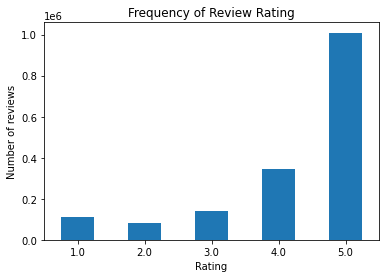

In [13]:
# Distribution of rating score
dfr.groupby('ratings').size().plot(kind='bar')
plt.title("Frequency of Review Rating")
plt.xlabel("Rating")
plt.ylabel("Number of reviews")
plt.xticks(rotation=0)

<AxesSubplot:xlabel='productId'>

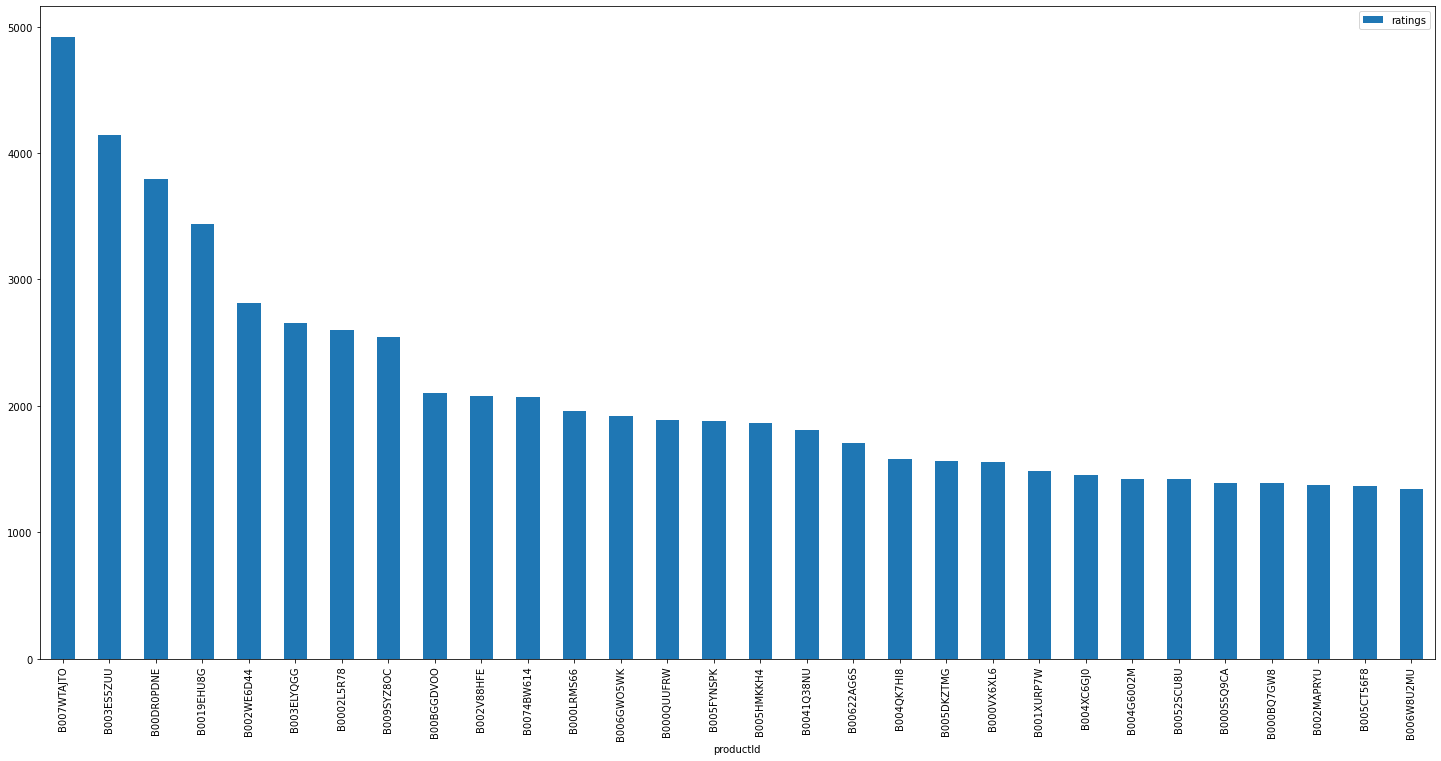

In [14]:
# puplar products
df_popular_pd = pd.DataFrame(dfr_new.groupby('productId')['ratings'].count())
most_popular = df_popular_pd.sort_values('ratings', ascending=False)
most_popular.head(30).plot(kind = "bar",figsize=(25, 12))

In [61]:
# save the data to a new csv file
import os
datapath = '../data'

datapath= os.path.join(datapath, '2.electronics_cleaned.csv')
#if not os.path.exists(datapath_ccattr_step2):
dfr_new.to_csv(datapath, index=False)